In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
STATES = np.arange(0,101)

In [3]:
def possible_actions(state):
    return np.arange(0, min(state, 100-state) +1)

In [4]:
def rewards_from_actions(state, value_function, pwin=0.9):
    actions = possible_actions(state)
    rewards = []
    for a in actions:
        lose_reward = 0
        lose_state = state - a
        win_state = state + a
        win_reward = 0
        if win_state >= 100:
            win_reward = 1
            win_state = 100
        rewards.append(pwin * (win_reward + value_function[win_state]) + (1-pwin)* (lose_reward + value_function[lose_state]))
    return rewards

In [5]:
# Value iteration
value_function = np.zeros([101])
th = 1e-3
pwin = 0.8
while True:
    delta = 0
    for s in STATES[1:-1]:
        old_v = value_function[s]
        rewards = rewards_from_actions(s, value_function, pwin)
        value_function[s] = max(rewards)
        delta = max(delta, np.abs(value_function[s] - old_v))
    if delta <= th:
        break      

In [6]:
# Define optimal policy
policy = []
for state in STATES[1:-1]:
    actions = possible_actions(state)
    rewards = []
    for a in actions:
        lose_reward = 0
        lose_state = state - a
        win_state = state + a
        win_reward = 0
        if win_state >= 100:
            win_reward = 1
            win_state = 100
        rewards.append(pwin * (win_reward + value_function[win_state]) + (1-pwin)* (lose_reward + value_function[lose_state]))
    policy.append(np.argmax(rewards))

Text(0, 0.5, 'Return')

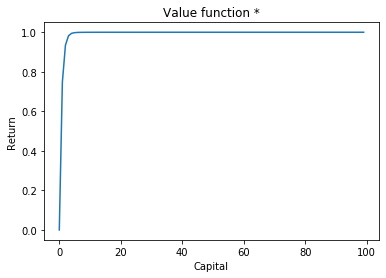

In [7]:
plt.plot(value_function[:-1])
plt.title("Value function *")
plt.xlabel("Capital")
plt.ylabel("Return")

Text(0, 0.5, 'Final policy (stakes)')

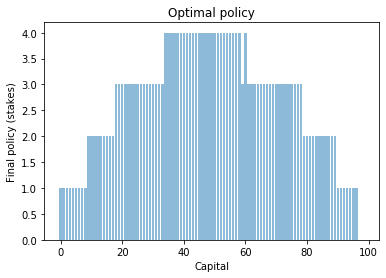

In [8]:
# plotting the bars
plt.bar(np.arange(0,99),policy, align='center', alpha=0.5)
plt.title("Optimal policy")
plt.xlabel("Capital")
plt.ylabel("Final policy (stakes)")